<a href="https://colab.research.google.com/github/DanielleRodriguez/Danielle_Projects/blob/main/DanyExam2Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a)** Upload the data then create a scatter plot of this data. Compute the covariance and
the correlation coefficient of the year and population size. What does the correlation
coefficient imply about the data? Treat this data set as a sample.

In [ ]:
#3)
from scipy.optimize import lsq_linear
import numpy as np
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('US_population_Updated1.csv')

data = df.to_numpy()

y_org = data[:,1]
print(y_org.shape)

y_pop = data[:,1] 
print(y_pop.shape)

x_org = data[:,0]
print(x_org.shape)

x_year = data[:,0] 
print(x_year.shape)

print(df)

Saving US_population_Updated1.csv to US_population_Updated1 (5).csv
(65,)
(65,)
(65,)
(65,)
    1950  158804
0   1951  160872
1   1952  163266
2   1953  165910
3   1954  168736
4   1955  171685
..   ...     ...
60  2011  311584
61  2012  314044
62  2013  316401
63  2014  318673
64  2015  320878

[65 rows x 2 columns]


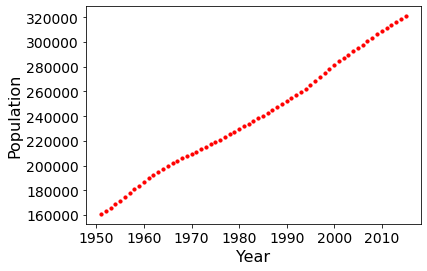

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.scatter(x_year,y_pop,s=10,c="red")
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

In [ ]:
#covariance
def covariance(x_year,y_pop):
  number_of_points = len(x_year)
  mean_x = np.mean(x_year)
  mean_y = np.mean(y_pop)
  denom = number_of_points - 1
  cov = np.sum((x_year - mean_x)*(y_pop - mean_y))/denom
  return cov

print(covariance(x_year,y_pop))

869910.078125


In [ ]:
#correlation coefficient
def correlation(x_year,y_pop,cov):
  number_of_points = len(x)
  denom = number_of_points - 1
  mean_x = np.mean(x_year)
  mean_y = np.mean(y_pop)  
  var_x = np.sum((x_year - mean_x)**2)/denom
  var_y = np.sum((y_pop - mean_y)**2)/denom
  std_x = np.sqrt(var_x)
  std_y = np.sqrt(var_y)
  cor_coef = cov/(std_x*std_y)
  return cor_coef

cov = covariance(x_year,y_pop)
print(correlation(x_year,y_pop,cov))

0.9979551724991247


The coefficient correlation implies that there is a positive linear relationship between the x and y variables; year and population. 

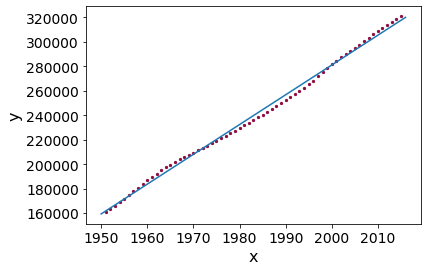

In [ ]:
number_of_points = np.shape(x_year)[0]
xt = x_year.reshape((-1, 1))

#or use SciPy
from scipy.optimize import lsq_linear

o = np.ones((number_of_points, 1))
#print(o)
#print(x)
#print(xt)
matrix = np.concatenate((xt, o), axis=1)
#print(matrix)
res = lsq_linear(matrix, y_pop)
#print(res)

import matplotlib.pyplot as plt
from matplotlib import cm

a = res.x[0]
b = res.x[1]


xp = np.linspace(np.min(x_year) - 1, np.max(x_year) + 1, 100)
yp = a*xp + b
plt.scatter(x_year,y_pop,s=5,c="#900C3F")
plt.plot(xp,yp)
#y_mean = np.mean(y_pop)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()


In [ ]:
#R^2
x = x_year.reshape((number_of_points,1))
#print(x)

fx = a*x_year + b
r = y_pop - fx

def R2(number_of_points,r,y):
  y_mean = np.sum(y_pop)/number_of_points
  SE_mean = sum((y_pop - y_mean)**2)
  SE = sum(r**2)
  R2 = 1 - SE/SE_mean
  return SE,R2
res = R2(number_of_points,r,y_pop)
print('Squared error for the model regression: ', res[0])
print('R-squared or Coefficient of Determination: ', res[1]) 

Squared error for the model regression:  555741722.25625
R-squared or Coefficient of Determination:  0.995914526317758


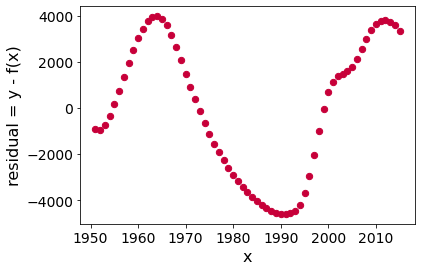

In [ ]:
#residuals

plt.scatter(x_year,r,s=40,c="#C70039")
plt.xlabel('x', fontsize=16)
plt.ylabel('residual = y - f(x)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
x_2020 = 2020
y_2020 = a*x_2020 + b

print(y_2020)

y_current = 331002
percent_error = ((y_current - y_2020)/ y_2020)
print(percent_error * 100,'%')

329698.4822115395
0.3953666330875377 %


When comparing my prediction with the current US population of 331,002,651, the percent error is 
.3954% 

**part d**

Let’s improve your model performance to get a smaller percent error. Please skim
through the references below and pick a way to improve the accuracy of your model.
Implement the “way” and show that the percentage error becomes smaller (without
adding the US population in 2020 into your data set)

In [ ]:
uploaded = files.upload()

import pandas as pd
df2 = pd.read_csv('US_population_Updated2.csv')

data2 = df2.to_numpy()

y_org2 = data2[:,1]
print(y_org2.shape)

y_pop2 = data2[:,1] 
print(y_pop2.shape)

x_org2 = data2[:,0]
print(x_org2.shape)

x_year2 = data2[:,0]
print(x_year2.shape)

print(df2)

Saving US_population_Updated2.csv to US_population_Updated2 (9).csv
(69,)
(69,)
(69,)
(69,)
    1950  158804
0   1951  160872
1   1952  163266
2   1953  165910
3   1954  168736
4   1955  171685
..   ...     ...
64  2015  320878
65  2016  323015
66  2017  325084
67  2018  327096
68  2019  329064

[69 rows x 2 columns]


In [ ]:
print(x_year2)

[1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


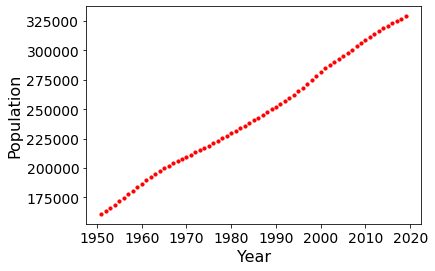

In [ ]:
plt.scatter(x_year2,y_pop2,s=10,c="red")
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()

In [ ]:
#covariance
def covariance2(x_year2,y_pop2):
  number_of_points2 = len(x_year2)
  mean_x2 = np.mean(x_year2)
  mean_y2 = np.mean(y_pop2)
  denom2 = number_of_points2 - 1
  cov = np.sum((x_year2 - mean_x2)*(y_pop2 - mean_y2))/denom2
  return cov

print(covariance2(x_year2,y_pop2))

984061.5294117646


In [ ]:
#correlation coefficient
def correlation(x_year2,y_pop2,cov2):
  number_of_points2 = len(x_year2)
  denom2 = number_of_points2 - 1
  mean_x2 = np.mean(x_year2)
  mean_y2 = np.mean(y_pop2)  
  var_x2 = np.sum((x_year2 - mean_x2)**2)/denom2
  var_y2 = np.sum((y_pop2 - mean_y2)**2)/denom2
  std_x2 = np.sqrt(var_x2)
  std_y2 = np.sqrt(var_y2)
  cor_coef2 = cov2/(std_x2*std_y2)
  return cor_coef2

cov = covariance(x_year,y_pop)
print(correlation(x_year,y_pop,cov))

0.9979551724991247


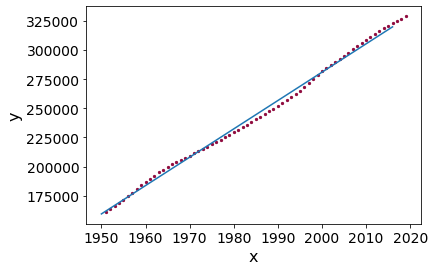

In [ ]:
number_of_points2 = np.shape(x_year2)[0]
xt2 = x_year2.reshape((-1, 1))

#or use SciPy
from scipy.optimize import lsq_linear

o2 = np.ones((number_of_points2, 1))
#print(o)
#print(x)
#print(xt)
matrix = np.concatenate((xt2, o2), axis=1)
#print(matrix)
res2 = lsq_linear(matrix2, y_pop2)
#print(res)

import matplotlib.pyplot as plt
from matplotlib import cm

a2 = res2.x[0]
b2 = res2.x[1]


xp2 = np.linspace(np.min(x_year2) - 1, np.max(x_year2) + 1, 100)
yp2 = a2*xp2 + b2
plt.scatter(x_year2,y_pop2,s=5,c="#900C3F")
plt.plot(xp,yp)
#y_mean = np.mean(y_pop)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axis('equal')
plt.show()


In [ ]:
#R^2
x2 = x_year2.reshape((number_of_points2,1))
#print(x)

fx2 = a2*x_year2 + b2
r2 = y_pop2 - fx2

def R2(number_of_points,r2,y2):
  y_mean2 = np.sum(y_pop2)/number_of_points2
  SE_mean2 = sum((y_pop2 - y_mean2)**2)
  SE2 = sum(r2**2)
  R2 = 1 - SE2/SE_mean2
  return SE2,R2
res2 = R2(number_of_points2,r2,y_pop2)
print('Squared error for the model regression: ', res2[0])
print('R-squared or Coefficient of Determination: ', res2[1]) 

Squared error for the model regression:  575568780.2425038
R-squared or Coefficient of Determination:  0.9964942214637948


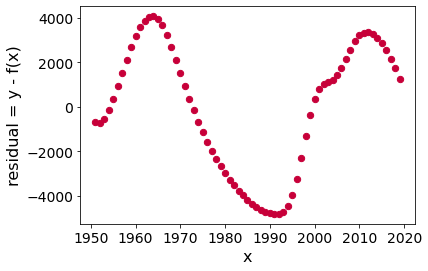

In [ ]:
#residuals

plt.scatter(x_year2,r2,s=40,c="#C70039")
plt.xlabel('x', fontsize=16)
plt.ylabel('residual = y - f(x)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
x2_2020 = 2020
y2_2020 = a2*x2_2020 + b2

print(y2_2020)

y2_current = 331002
percent_error2 = ((y2_current - y2_2020)/ y2_2020)
print(percent_error2 * 100,'%')

330245.0315430518
0.22921418481643233 %


I decided to pull data from [here](https://www.worldometers.info/world-population/us-population/) and added to my initial dataset. Years added include 2016, 2017, 2018, and 2019. As you can see, by including the new data, the percent error decreased from .3954% to .2292%